In [13]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import warnings
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

In [36]:
#reading the auction list file which is avaialb;e for public and dealer for different brnches on https://www.iaai.com/LiveAuctions

automobile1 = pd.read_csv(r'Documents/BranchSalesListItems_07082019.csv')
automobile2 = pd.read_csv((r'Documents/BranchSalesListItems_07252019.csv')
automobile=pd.concat([automobile1, automobile2], ignore_index=True)
automobile.head()

,Stock#,Lane,Item#,Year,Make,Model,Odometer,VIN,Sale Document,Loss Type,...,Primary Damage,Secondary Damage,Run & Drive,Starts,Odometer Status,Fuel Type,Cylinders,Transmission,Provider,Buy Now Price
0,25239190,NaN,#TBD,2005,ACURA,MDX,"142,876",2HNYD18945H533515,SALVAGE CERTIFICATE-CA,COLLISION,...,FRONT END,LEFT & RIGHT,NO,NO,ACTUAL,Gasoline,6 Cyl,Automatic,Mercury Insurance,$675.00
1,25162867,NaN,#TBD,2011,AUDI,Q5,"79,500",WA1WKAFP4BA058134,PREVIOUS SALVAGE-MI,WATER,...,FLOOD,FRONT & REAR,NO,NO,ACTUAL,Gasoline,6 Cyl,Automatic,Progressive Casualty Insurance,"$5,700.00"
2,25397273,NaN,#TBD,2005,BENTLEY,CONTINENTAL,"71,045",SCBCR63W25C028848,CLEAR-FL,OTHER,...,NONE,UNKNOWN,YES,YES,ACTUAL,Gasoline,12 Cyl,Automatic,NaN,"$26,000.00"
3,25112456,NaN,#TBD,2013,BMW,328,"111,025",WBA3B3C58DF536341,CLEAR-MI,COLLISION,...,RIGHT SIDE,FRONT & REAR,YES,YES,ACTUAL,Gasoline,4 Cyl,Automatic,Progressive Casualty Insurance,NaN
4,25102838,NaN,#TBD,2004,BMW,330,"151,574",WBAEW53444PN35780,CLEAR-MI,COLLISION,...,FRONT & REAR,LEFT SIDE,NO,NO,ACTUAL,Gasoline,6 Cyl,Automatic,Hanover Insurance,NaN


In [23]:

 #removing unneccessary coloumns and features are less important for buyer to buy a car . 
automobile.drop(['Item#','Cylinders','Fuel Type','Public','Lane', 'Vehicle Location Info','Auction Date','Buy Now Price'],axis=1 , inplace=True)
#replace null value with zero value 

automobile.head()

,Stock#,Year,Make,Model,Odometer,VIN,Sale Document,Loss Type,Primary Damage,Secondary Damage,Run & Drive,Starts,Odometer Status,Transmission,Provider
0,25006001,2015,ACURA,MDX,"58,351",5FRYD4H46FB024656,SALVAGE-MI,COLLISION,LEFT SIDE,REAR,YES,YES,ACTUAL,Automatic,Progressive Casualty Insurance
1,25623586,2011,ACURA,RDX,"90,025",5J8TB1H51BA006997,CLEAR-MI,OTHER,LEFT FRONT,MECHANICAL,NO,NO,ACTUAL,Automatic,NaN
2,25377811,2010,ACURA,TSX,"108,122",JH4CU2F65AC008800,SALVAGE-MI,COLLISION,LEFT SIDE,NaN,YES,YES,ACTUAL,Automatic,USAA - ACH
3,25623054,2005,ASTON MARTIN,DB9,"59,231",SCFAD02A65GB03215,CLEAR-MI,OTHER,MECHANICAL,NONE,NO,NO,ACTUAL,Automatic,NaN
4,25530378,2008,AUDI,A4,"203,920",WAUDF78EX8A129388,CLEAR-MI,OTHER,FRONT END,LEFT FRONT,YES,YES,ACTUAL,Automatic,NaN


In [37]:
#replacing odemeters which has nan value with zero
automobile.Odometer=automobile.Odometer.fillna(0)

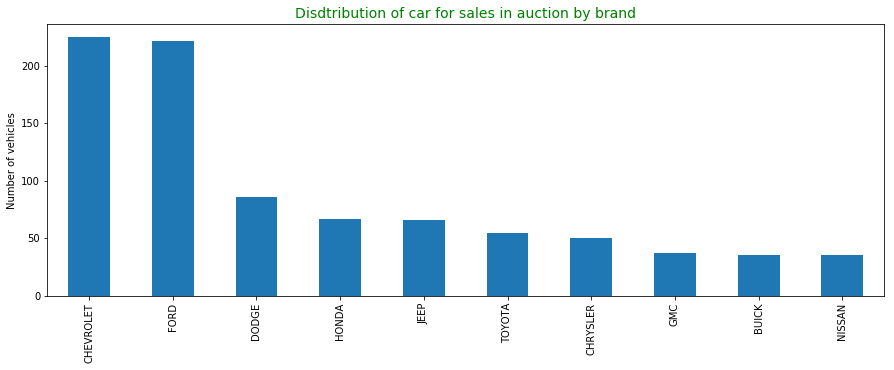

In [38]:
#classified cars in 4 segments , we are looking to analyze the price of cars in Economy segment 

automobile.insert(4, "segment",  True)
def Classifysegment(make):
 
    Midlevel = ['Alfa Romeo', 'RAM','Chrysler', 'Infiniti', 'MINI', 'Volkswagen' , 'JEEP','CADILLAC','LINCOLN']
    Economy = ['TOYOTA' , 'HONDA','MAZDA' , 'CHEVROLET' , 'MERCURY','BUICK','SUBARU','VOLVO' ,'GMC','DODGE','KIA','Saab', 'PONTIAC' , 'NISSAN' ,'JEEP']
    Laxury=['BMW','LEXSUS', 'MERCEDES-BENZ','LEXUS','PORSCHE','JAGUAR']
    SUPERLUXERY=['BENTLEY' , 'MASARATI']
    if make in Midlevel:
        return 'Midlevel'
    elif make in Economy:
        return 'Economy'
automobile['segment'] = [Classifysegment(make) for make in automobile.Make ]#list comprehension
#Rename Some column of dataset
automobile=automobile.rename(columns = {'Run & Drive':'Run'})

#This bar char below shows destribution of car by make in the IAA auction
import matplotlib.pyplot as plt
%matplotlib inline
automobile.Make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.title('Disdtribution of car for sales in auction by brand', color='green', fontsize=14)
plt.show()

In [54]:

#conver Milage DataType from string to Intiger
automobile.Odometer=automobile.Odometer.astype(str).str.replace(",", "").astype(int)

#filtering cars for sales in the auction to those with these condition . IN my experince these cars can be sell in tax season
#with highest profit with less amount of time

automobile=automobile.rename(columns = {'Sale Document':'SaleDoc','Primary Damage':'PrimaryDamage','Secondary Damage':'SecondaryDamage'})

#filtering cars with the condition that with my experince I can sell buy and repire them less than $3000 and make $1000 profit
df_filtered =automobile[(automobile.Odometer<= 160000 )&( automobile.Odometer > 80000 ) & (automobile.Starts == "YES") & (automobile.Run == "YES")
                        & (automobile.segment == "Economy") & (automobile.Year<= 2011 ) & (automobile.Year>= 2005 )
                       & (automobile.SaleDoc.str.contains('CLEAR')) & (pd.notnull(automobile['Provider']))  & (automobile.PrimaryDamage !="LEFT REAR") ] 
#I droped agifn unessesary colloumns to reach the coloumns which make the most infuence in buyer bid price , I want to 
#give these data to machine to predict the price
df_filtered.drop(['segment','Starts','Run','Odometer Status','Lane','Item#','Auction Date','Public','Buy Now Price','Cylinders','Fuel Type','Vehicle Location Info', 'Transmission','SaleDoc' ,'VIN','Loss Type' ,'Provider'],axis=1 , inplace=True)
df_filtered.insert(5, "$BidSalesPrices",0)
#adding the price of car that sold in auction at bid price in the BidSalesPrices coloumn 

df_filtered.loc[:, "$BidSalesPrices"] = [ 1050, 1600,7000, 1500, 975, 1700, 1250, 3450,1100,1000,1850,1500,1300,1450,700,800,1800,350,1400,1000,800 ]
#creating dictionary for dameges of the cars which get to the accident , I rated the type accident from low to high regarding what
#part of car get to accident . IF it doesnot have an accident I rated that 0 
df_filtered.SecondaryDamage = df_filtered.SecondaryDamage.replace(np.nan, 'nothing')
PrimaryDamage = {'FRONT END': 1.0,'LEFT SIDE': 3.0,'FRONT & REAR':4.0 ,'LEFT & RIGHT':5.0, 'REAR':6 ,'RIGHT REAR':7,'INTERIOR BURN':8  , 'RIGHT FRONT':9}
SecondaryDamage = {'REAR': 2,'RIGHT FRONT': 2.5,'LEFT SIDE':3,'FRONT & REAR':4 ,'LEFT & RIGHT':5 ,'nothing':0,'REAR':6, 'RIGHT FRONT':9,'RIGHT REAR':7,'INTERIOR BURN':8,'FRONT END': 10}
df_filtered.loc[:, "PrimaryDamage"] = [PrimaryDamage[item] for item in df_filtered.PrimaryDamage]
df_filtered.loc[:, "SecondaryDamage"] = [SecondaryDamage[item] for item in df_filtered.SecondaryDamage]
warnings.filterwarnings("ignore", category=FutureWarning)

df_filtered.head()

,Stock#,Year,Make,Model,Odometer,$BidSalesPrices,PrimaryDamage,SecondaryDamage
92,25294725,2010,CHEVROLET,HHR,88069,1050,1.0,5
102,24790296,2009,CHEVROLET,IMPALA,132063,1600,3.0,6
210,24883315,2009,DODGE,RAM 1500,129447,7000,5.0,0
355,25273689,2011,HONDA,ACCORD,98029,1500,4.0,3
356,25175362,2008,HONDA,ACCORD,150787,975,1.0,0


In [53]:
#import the necessary modules and prediction


# 1. Encoding
svc_model = LinearSVC(random_state=0)
le = preprocessing.LabelEncoder()
# 1. A. Encoding Make
ls = le.fit(df_filtered['Make'].values)
df_filtered['Make'] = ls.transform(df_filtered['Make'].values) 
# 1. B. Encoding Model
le = le.fit(df_filtered['Model'].values)
df_filtered['Model'] = le.transform(df_filtered['Model'].values) 
classifier = DecisionTreeClassifier()
classifier = classifier.fit(df_filtered, df_filtered['$BidSalesPrices'])
pred = classifier.predict(df_filtered)
print(pred)


classifier2= KNeighborsClassifier(n_neighbors=3)
classifier2 =classifier2.fit(df_filtered, df_filtered['$BidSalesPrices'])
prediction = classifier.predict(df_filtered)
print(prediction)
# 2. Training
pred = svc_model.fit(df_filtered, df_filtered['$BidSalesPrices'])

 #3. Testing
pred = pred.predict(df_filtered)
print("LinearSVC accuracy : ",accuracy_score(df_filtered['$BidSalesPrices'], pred, normalize = True))


[1050 1600 7000 1500  975 1700 1250 3450 1100 1000 1850 1500 1300 1450
  700  800 1800  350 1400 1000  800]
[1050 1600 7000 1500  975 1700 1250 3450 1100 1000 1850 1500 1300 1450
  700  800 1800  350 1400 1000  800]
LinearSVC accuracy :  0.047619047619047616
